In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
import sys
from sklearn.metrics import silhouette_score
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df=pd.read_excel("C:\\Users\\HARI\\Downloads\\cust_data.xlsx")

In [3]:
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [5]:
df1=df.dropna()

In [6]:
df1.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27276 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 27276 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  27276 non-null  int64 
 3   Jordan                  27276 non-null  int64 
 4   Gatorade                27276 non-null  int64 
 5   Samsung                 27276 non-null  int64 
 6   Asus                    27276 non-null  int64 
 7   Udis                    27276 non-null  int64 
 8   Mondelez International  27276 non-null  int64 
 9   Wrangler                27276 non-null  int64 
 10  Vans                    27276 non-null  int64 
 11  Fila                    27276 non-null  int64 
 12  Brooks                  27276 non-null  int64 
 13  H&M                     27276 non-null  int64 
 14  Dairy Queen             27276 non-null  int64 
 15  Fe

In [29]:
lb = LabelEncoder()
df1["Gender"] = lb.fit_transform(df1["Gender"])

In [11]:
df1.describe()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,27276.000000,27276.00000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,...,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000
mean,15026.349795,0.19145,4.244647,0.276873,0.262795,0.227489,0.168463,0.147492,0.142140,0.108740,...,0.102691,0.272877,0.376778,0.160141,0.077797,0.057303,0.193760,0.120656,0.090592,0.071271
std,8655.855928,0.39345,3.580825,0.817612,0.719259,0.925124,0.757750,0.656230,0.530013,0.519941,...,0.492114,0.716391,0.760309,0.507343,0.384146,0.299185,0.628296,0.457624,0.405152,0.387592
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7557.750000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15065.500000,0.00000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22537.250000,0.00000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,1.00000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [12]:
scaler = StandardScaler()

In [30]:
df_scaled = df1
df_scaled.shape

(27276, 38)

In [31]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=4)

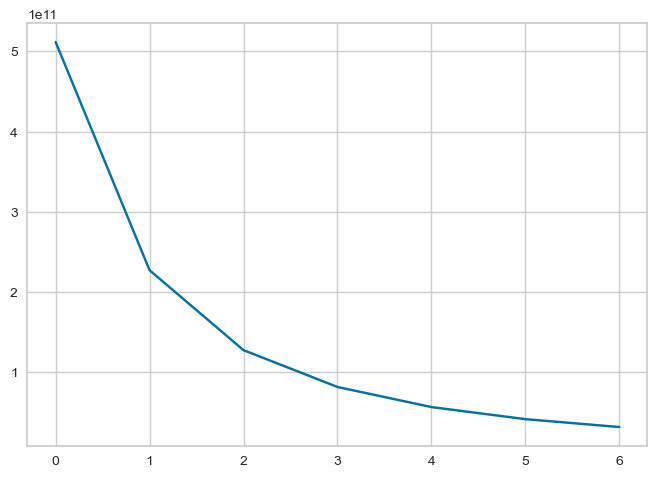

In [32]:
#Elbow-curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [33]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
# silhouette score

    

For n_clusters=2, the silhouette score is 0.6262938916067652
For n_clusters=3, the silhouette score is 0.5900528843867766
For n_clusters=4, the silhouette score is 0.5723043227944253
For n_clusters=5, the silhouette score is 0.5608770530889804
For n_clusters=6, the silhouette score is 0.5536618369262414
For n_clusters=7, the silhouette score is 0.5483431972940634
For n_clusters=8, the silhouette score is 0.5449717710417439


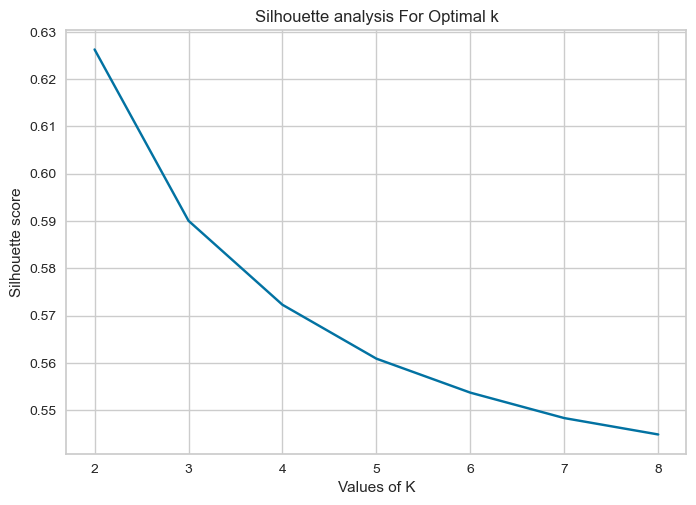

In [34]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
 
 
    silhouette_avg.append(silhouette_score(df_scaled, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [36]:
# Final model with k=3
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=2)

In [38]:
df1['Cluster_Id'] = kmeans.labels_
df1


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster_Id
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,29997,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,29998,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,29999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


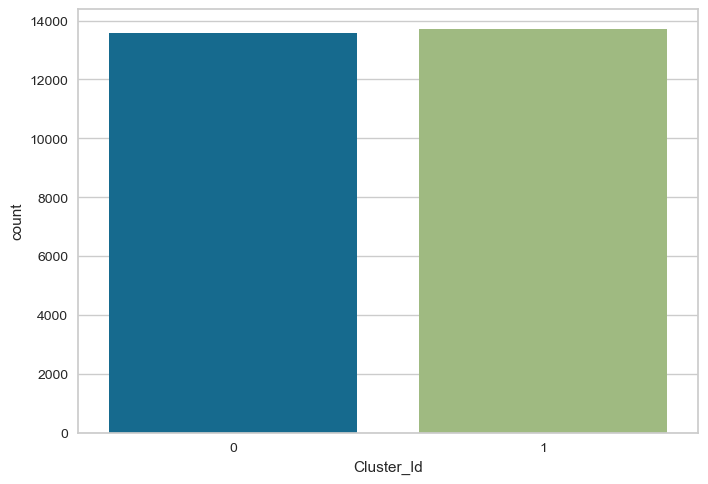

In [39]:
sns.countplot(x ='Cluster_Id', data = df1)
 
# Show the plot
plt.show()